In [2]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time
from scipy import interpolate
import Zach_OPTIMIZER.EBMOptimizer as opt

import Bell_EBM as ebm

In [6]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 8, e=0.3)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

In [11]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat=8)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

#==========Baseline Creation==========
tUpdates = 500. #Amount of timesteps in baseline
tOrbits = 1 #Number of orbits in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*tOrbits
dt = system.planet.Porb/tUpdates
testTimes, testMaps, testttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
testLightcurve = system.lightcurve()

In [30]:
times = (t0 + np.arange(int(np.rint((t1-t0)/dt)))*dt)[:,np.newaxis]
TAs = system.planet.orbit.true_anomaly(times)[:,:,np.newaxis]
maps = T0[np.newaxis,:]

In [31]:
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*1
dt = system.planet.Porb/1000

In [6]:
%timeit system.run_model(T0, t0, t1, dt, verbose=False)

185 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit system.ODE_EQ(times[1], maps[-1], dt, TAs[1])

176 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%timeit system.Fin(times[1], TAs[1])

134 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit system.planet.Fout(maps)

13 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
%timeit system.Firr(times[1], TAs[1], True, None, 4.5e-6)

19.6 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%timeit system.planet.weight(times[1], TAs[1])

101 µs ± 327 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
%timeit system.planet.orbit.get_ssp(times[1], TAs[1])

12.5 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
refLon, refLat = system.planet.orbit.get_ssp(times[1], TAs[1])

In [43]:
%timeit (np.cos(system.planet.map.latGrid_radians)*np.cos(refLat*np.pi/180.)*np.cos((system.planet.map.lonGrid_radians-refLon*np.pi/180.))+ np.sin(system.planet.map.latGrid_radians)*np.sin(refLat*np.pi/180.))

42.8 µs ± 537 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
%timeit system.planet.map.latGrid_radians

265 ns ± 4.56 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [38]:
%timeit np.cos(273672179)

2.2 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%timeit np.pi

65.3 ns ± 0.461 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [45]:
weight = (np.cos(system.planet.map.latGrid_radians)*np.cos(refLat*np.pi/180.)*np.cos((system.planet.map.lonGrid_radians-refLon*np.pi/180.))+ np.sin(system.planet.map.latGrid_radians)*np.sin(refLat*np.pi/180.))

In [46]:
%timeit np.max(np.append(np.zeros_like(weight[np.newaxis,:]), weight[np.newaxis,:], axis=0), axis=0)

26.2 µs ± 582 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [47]:
%timeit system.star.Fstar(True, None, 4.5e-6)

2.01 µs ± 71.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Starting baseline generation...
Baseline generation complete; Time to Compute: 17.98s
First pass data points assigned
Starting first pass...
First pass finished : Time to compute: 23.94s
Processing first pass data...
Second pass data points assigned
Starting second pass...
Second pass finished : Time to compute: 6.46s
Processing second pass data...
Temporal: 200.0 Spacial: 18.0
Time for compute: 216.08ms : Error: 96.46ppm
Expected compute time @ 1,000,000 cycles: 60.02 Hrs


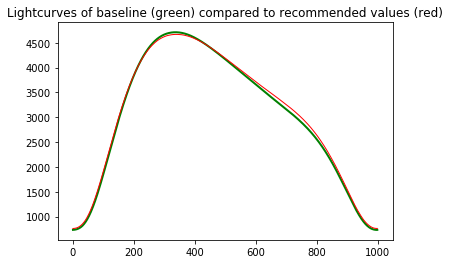

In [9]:
opt.Optimize(_star=star, _planet=planet, _error=100., verbose=True)